<a href="https://colab.research.google.com/github/mukthakaja/ai-ml-experiment-learning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification problem is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X,y = make_circles(n_samples, noise=0.03, random_state = 42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now ... let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:,0], "X1" : X[:,1], "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


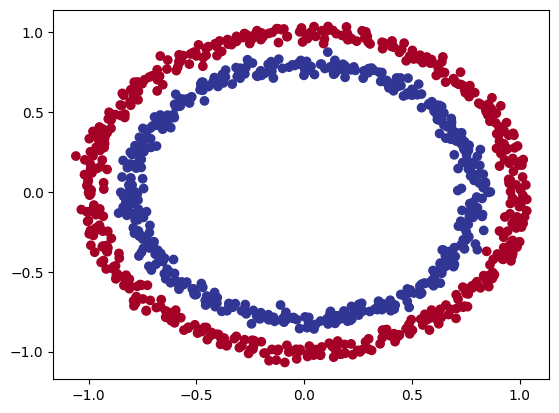

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = "adam", metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.2903 - accuracy: 0.4360
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2061 - accuracy: 0.4420
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1067 - accuracy: 0.4490
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0678 - accuracy: 0.4530
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0334 - accuracy: 0.4560


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X,y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4610


[0.693152666091919, 0.460999995470047]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy, it's performing as if it's guessing.

So let's step things up a notch and add an extra layer

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = "adam", metrics = ["accuracy"])
model_2.fit(X,y, epochs = 100, verbose = 0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7153 - accuracy: 0.4960


[0.7152864336967468, 0.4959999918937683]

## Improving our model

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer
2. Compiling a model - here we might want to choose a different optimization function such as Adam or SGD
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])
model_3.compile(loss = tf.keras.losses.mean_absolute_error, optimizer = "adam", metrics = ["mae"])
model_3.fit(X, y , epochs = 100, verbose = 0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5120


[0.6953033804893494, 0.5120000243186951]

To visualize our model's predictions, let's create a function

This function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y) :
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X values (for predictions)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1 :
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:, 1], c = y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classification


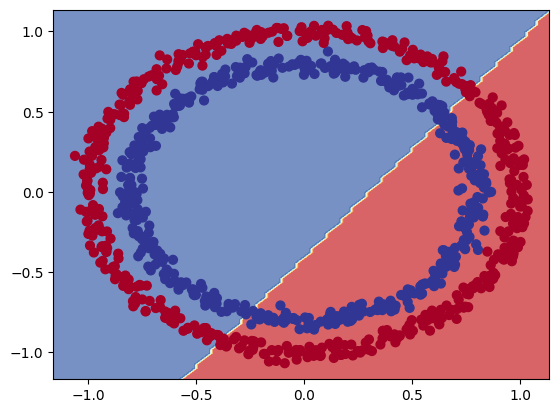

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X=X, y=y)

In [ ]:
# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

X_reg_train = X_regression [:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_11' (type Sequential).
    
    Input 0 of layer "dense_16" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_11' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])
model_3.compile(loss = tf.keras.losses.mae, optimizer = "adam", metrics = ["mae"])
model_3.fit(X_reg_train, y_reg_train , epochs = 100)

NameError: name 'input_shape' is not defined